<a href="https://colab.research.google.com/github/Ardaolmez/Neuroscience-Projects/blob/main/LFP_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with LFP data in Python

In [ ]:
import os.path
import numpy as np
import scipy
import scipy.io
import scipy.signal
import matplotlib.mlab
import matplotlib.pyplot as plt
import quantities as pq
%matplotlib inline

## 1) Loading Matlab data

In the following exercises we will load, visualize and analyze (parallel) LFP data from an actual electrophysiological recording. Data from experimental electrophysiology labs is frequently exchanged in the Matlab `.mat` file format. Luckily, `scipy` supplies ready-made functions to load and save data `x` from/to this file type:

    x=scipy.io.loadmat(filename)
    scipy.io.savemat(filename,x)

We use the `loadmat` function to load the data file `dataset1.mat` in the `data` subdirectory.

In [ ]:
filename = os.path.sep.join(['data', 'dataset1.mat'])
print("Loading {0}".format(filename))
dataset1 = scipy.io.loadmat(filename, squeeze_me=True)

Loading data/dataset1.mat


The function `scipy.io.loadmat` loads the data into a Python dictionary. Dictionaries consist of key-value pairs. The key (usually a string) describes its connected value. The value is a container for data of different type, e.g. a string or numpy.ndarray.

The option `squeeze_me` in `loadmat()` is necessary to avoid unneccessary array dimensions in the resulting values of the dictionary. If `squeeze_me=False` is specified, all values are returned as 2-D matrices (or higher), even if it's just a single number.

**Task 1:** Write a routine that prints the contents of the loaded file in `dataset1` in a readable format, including the data type of the data objects and, in case of numpy arrays, also the array dimensions.

**Note:** To determine the type of each variable, use `type()`. To determine the dimensions of an `ndarray`, use `np.shape()`. For all Python objects you can also get a list of their attributes with the `dir()` function. Furthermore, you can use the `help()` function to get more information about objects or functions.

In [ ]:
# TASK1,STUDENTS:
# For all keys of lfp1, print the key and corresponding value type
# For values of type numpy.ndarray print the value shape
for k, v in dataset1.items():
    print(k)
    print(dataset1[k])
    print(type(dataset1[k]))
    if isinstance(dataset1[k], np.ndarray):
        print(np.shape(dataset1[k]))

__header__
b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 14 16:08:12 2012'
<class 'bytes'>
__version__
1.0
<class 'str'>
__globals__
[]
<class 'list'>
lfp_matrix
[[ 28.20184697  42.70184697  42.70184697 ...  37.20184697  45.20184697
   26.20184697]
 [ 48.22661397  40.22661397  50.72661397 ...  47.72661397  53.72661397
   52.22661397]
 [-65.08365759 -44.08365759 -65.08365759 ...  96.41634241 147.41634241
   85.91634241]
 ...
 [-12.98395062 -17.98395062 -55.98395062 ... -17.98395062 -18.48395062
  -16.98395062]
 [-21.50426309  19.49573691   6.49573691 ...  40.49573691 119.49573691
   74.49573691]
 [ -0.2699877    5.2300123   -6.7699877  ... -33.2699877  -15.2699877
    3.7300123 ]]
<class 'numpy.ndarray'>
(40, 626)
time
[-298 -294 -290 -286 -282 -278 -274 -270 -266 -262 -258 -254 -250 -246
 -242 -238 -234 -230 -226 -222 -218 -214 -210 -206 -202 -198 -194 -190
 -186 -182 -178 -174 -170 -166 -162 -158 -154 -150 -146 -142 -138 -134
 -130 -126 -122 -118 -114 -110 -106 -102  -

The data you have loaded contains three interesting variables contained in the dictionary under the keys `time`, `sf`, and `lfp_matrix`. The latter contains the actual LFP signal, where rows are the individual trials of an experiment (first index), and columns are the time bins (second index) corresponding to the trial time stored in `time` (in ms). Finally, `sf` contains the sampling frequency in Hz.

To make our life easier, let's define a few variables that contain the relevant data and add the corresponding quantity units.

To remind you, the quantities library only supports basic math operations! In practice it is sometimes necessary to access the raw data without the unit. This can be done via `lfps1.magnitude`. We can add the corresponding quantity again to the resulting array afterwards.

In [ ]:
lfps1 = dataset1['lfp_matrix'] * pq.uV
times1 = dataset1['time'] * pq.ms
sf1 = dataset1['sf'] * pq.Hz

# 2) Visualizing the LFP

## 2.1) Plot LFPs

To get a first impression of the recorded data we will visualize the recorded data. Use the function below to nicely plot the LFP traces of all trials.

In [ ]:
def plot_lfp(lfps, times, title=None, spacing=5, color=None, ax=None):
    '''
    Plot LFPs.

    lfps: LFP signals with trial_id as first dimension and sample_id as second dimension.
          LFP signals must be arranged according to trial ID.
    times: time stamps of the recorded LFP samples. Must be of same length as second dimenion of lfps
    title: title of the figure
    spacing: vertical spacing between two LFP signals
    color: color to used for plotting
    ax: axis onto which to plot
    '''
    # create axis if not given
    if ax is None:
        fig, ax = plt.subplots()

    # Plots lfp signals for each trial
    for trial_id, lfp in enumerate(lfps):
        ax.plot(times, lfp.magnitude + trial_id * spacing, color=color)

    # Defines plot parameters for y-axis
    ax.set_xlabel(f't ({times.dimensionality})', size=16)

    # Defines plot parameters for y-axis
    ax.set_ylabel('trials', size=16)
    ax.set_yticks(np.arange(0, len(lfps)*spacing+1, spacing*10))
    ax.set_yticklabels([str(i) for i in np.arange(0, len(lfps)+1, 10)])

    # Adjusts axis
    ax.axis('tight')

    # Adds the title to the figure
    ax.set_title(title, size=18)

    return ax

**TASK 2a:** Plot the loaded LFPs and provide a meaningful title for the figure. Use the additional parameters of `plot_lfp` to increase the readability of your plot. What are the optimal settings to plot this dataset?

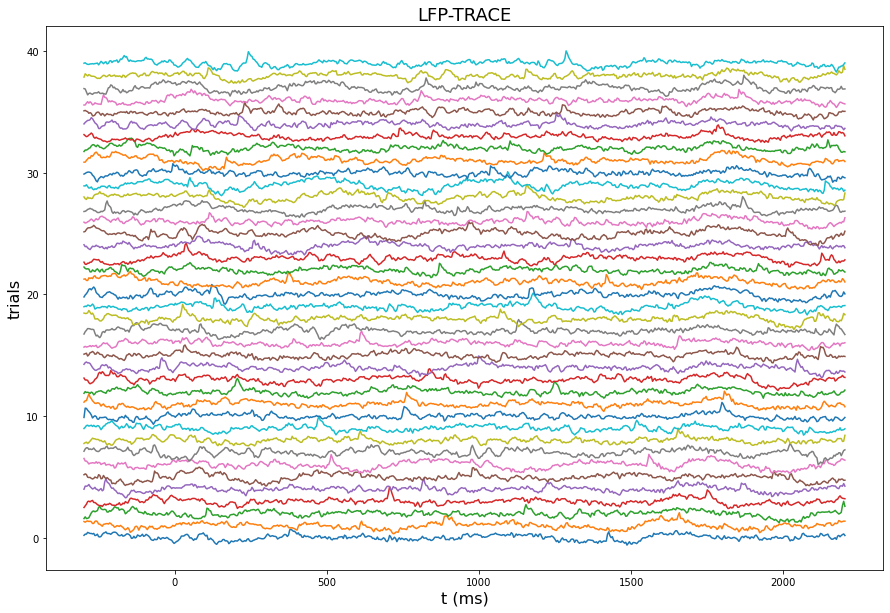

In [ ]:
# TASK2a, STUDENTS:
# Use plot_lfp() to plot our normalized LFPs

plot_lfp(lfps1,times1,title="LFP-TRACE",spacing=150)

# for better visibility
plt.gcf().set_size_inches(15, 10)


## 2.2) Normalize LFP

In the previous task you had to manually adjust the spacing between the different LFP traces in order to avoid overlapping, which are hard to read. A more general approach is to normalize the recording signals beforehand, which will also later be important for some analysis methods. A standard LFP normalization is the $z$-transformation, wzhich accounts for variations in the absolute signal amplitude and variance across different signals (trials).

**Task 2b:** Complete the function that performs a $z$-transform of the data, that is, subtract the mean of each trial, and divide by its standard deviation (`np.mean()` and `np.std()`): $$s \rightarrow \frac{s-\bar s}{\sigma_{s}}$$

**Note:** To perform an operation between two ndarrays (like substracting an array of averages from array of lfp signals) it is required that their dimensions are compatible. In Python this is handled via [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html). To make the broadcasting work in some cases it is necessary to add an extra empty dimension to an array (`x`). This can be done in multiple equivalent ways: `x[None,:]`, `x[np.newaxis,:]`, `np.expand_dim(x, axis=0)`, or `x.reshape(...)`. Have a try how this changes the arrays shape and `ndim` attribute.

In [ ]:
# TASK2b,STUDENTS:
def perform_zscore(input_lfps):
    '''
    This function normalizes each lfp trace in an array of lfps in a separate manner by z-transforming it.
    '''

    # Calculate the mean and standard deviation along the sample_id axis for all trials simultaneously
    # Hint: Use numpy functions for this
    sigmean = np.mean(input_lfps, axis=1)
    sigstd = np.std(input_lfps,axis=1)
    print(len(sigmean))
    # Subtract the mean signal of each trial separately
    print(input_lfps.shape[1])
    print(input_lfps.shape[0])
    dim=input_lfps.shape[0]
    for j in range(dim):
        for i in range(len(sigmean)):
            input_lfps[i,j]= input_lfps[i,j]-sigmean[i]
            input_lfps[i,j]=(input_lfps[i,j]/sigstd[i])* pq.V


    # Divide each trial by its standard deviation

# print the first 5 lfp values from the first trial
#sigmean = np.mean(lfps1, axis=1)
#sigstd = np.std(lfps1,axis=1)
#print(sigstd)
#print((lfps1[:,0]-sigmean[0])/sigstd[0])
# z-score lfps of dataset1 by using the function perform_zscore
print(f'dataset1 values before zscoring: {lfps1[0,0:5]}')
perform_zscore(lfps1)
print(f'dataset1 values after zscoring: {lfps1[0,0:5]}')
# print the first 5 lfp values from first the trial stored in dataset1
print(f'dataset1 values after zscoring: {dataset1["lfp_matrix"][0,0:5]}')

dataset1 values before zscoring: [28.20184697 42.70184697 42.70184697 64.20184697 57.70184697] uV
40
626
40
dataset1 values after zscoring: [ 748031.69226591 1177784.76487566 1177784.76487566 1815004.83805563
 1622356.90895471] uV
dataset1 values after zscoring: [28.20184697 42.70184697 42.70184697 64.20184697 57.70184697]


**TASK 2b: Questions**
* **q1:** Why does the function `perform_zscore` contain no `return` statement?
* **Bouns q2:** What is the advantage and disadvantage of constructing functions using this approach?

**STUDENTS, Answers:**
* **for q1:** In this function, we change the input permanently,thatswhy we dont need to create new object and load zscore in new object.
* **for Bonus q2:** Disadvantages: we can not reach original data(data without z score), but these function doesnt create a new object thatswhy we are saving space in memory.


## 2.3) Comparison of original and z-scored data

Compare the normalized signals to the original (raw) signals by plotting both in one figure in different subplots (panels). You can use the `plt.subplot(rows, columns, axis)` function to define the number of rows and columns of subplots and the axis parameter to select a specific subplot. Eg. `plt.subplots(2,1,1)` creates two subplots in different rows and selects the first subplot for further plotting.

We now compare the z-transformed data to the non-normalized one. To this end, we recreate a new quantity array named `lfps1_raw` based on the original data in `dataset1` just like above, and use the `plot_lfp()` function to plot them.

<AxesSubplot:title={'center':'Normalized LFP traces'}, xlabel='t (ms)', ylabel='trials'>

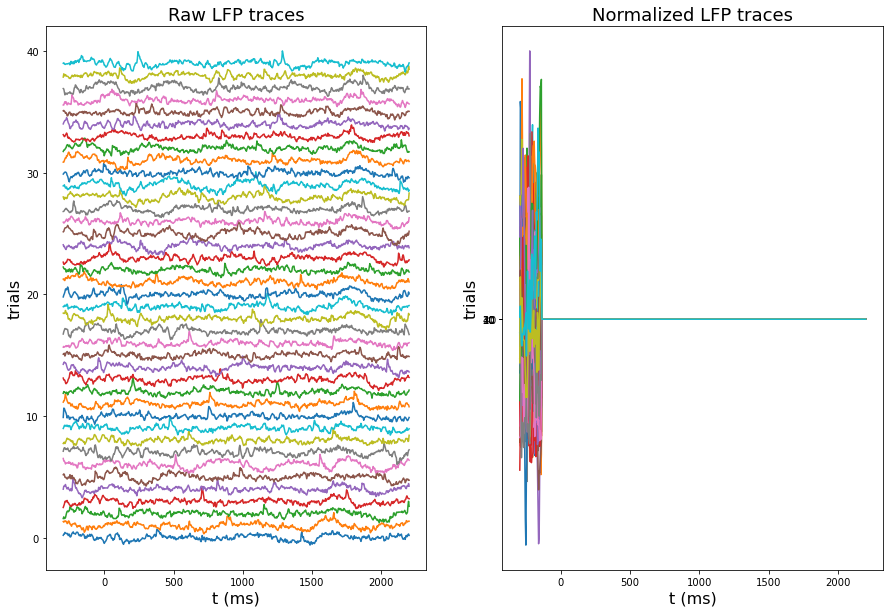

In [ ]:
lfps1_raw = dataset1['lfp_matrix'] * pq.uV

# plotting raw and z-scored data in different subplots using plot_lfp
fig, ax = plt.subplots(ncols=2, figsize=(15,10))

plot_lfp(lfps1_raw, times1, spacing=150, title='Raw LFP traces', ax=ax[0])

plot_lfp(lfps1, times1,title='Normalized LFP traces', ax=ax[1])

As you can see, zscored LFPs (Plot of normalized LFP traces) are better comparable as each trace is individually scaled to have a mean of 0 and a standard deviation of 1. Because of the consistent scale there is also no extensive overlapping with neighboring traces. This is not necessarily the case when manually setting the spacing between the LFP traces (Plot of non-normalized LFP traces) as this doesn't take into account the variance of the individual traces.

**TASK 2c, Questions:**
* **q1:** Which frequency components can you identify by eye in the traces? Provide an example trial_id & time window.
* **q2:** Consider the cross-trial variability in the data: Identify one period where the activity is similar across trials. Think about how the frequencies in this period differ from the rest of the traces.

**STUDENTS, Answers:**
* **for q1:** `$$$`
* **for q2:** `$$$`

# 3) Spectral analysis

## 3.1) Power spectrum of the LFP

To better understand the frequency composition in the data, we will create a power spectrum by Welch's method using

    matplotlib.mlab.psd()  

The `psd` function does not contain the concept of trials in order to obtain a trial-averaged power spectrum. You could of course just use the `psd` function to calculate the spectra of the individual trials (rows of the LFP matrix) and then average these using `numpy.mean()`. But it is much easier to concatenate all trials into one long vector with the given `conc_lfps4psd()` function and use this vector as input time series to the `psd()` function.

In [ ]:
# Function to concatenate lfp signals of multiple trials
def conc_lfps4psd(lfps, nfft=256):
    '''
    Concatenates lfps in from different trials (rows) for a power spectrum analysis.

    lfps: numpy matrix containing lfp signals of different trials (along first dimension)
    NFFT: The number of data points used in each block for the FFT used in matplotlib.mlab.psd() function

    Returns concatenated signals as quantity numpy array.
    '''
    # Zero-pad each analog signal to a multiple of the given NFFT
    p = (1 - np.modf(float(lfps.shape[1])/nfft)[0]) * nfft/2
    pad_width = (int(np.floor(p)), int(np.ceil(p)))

    lfps_padded = np.pad(lfps,((0,0),pad_width),'constant') * lfps.units
    lfps_concatenated = lfps_padded.flatten()

    return lfps_concatenated

**TASK 3a:** Complete the `plot_psd()` function, generate a concatenated signal of our normalized LFP, and plot the power spectrum of the concatenated signal. Make sure to plot the results in a semilogarithmic fashion (Hint: look in the [matplotlib documentation](https://matplotlib.org/2.0.2/search.html?q=logarithmic) for a corresponding function).

In [ ]:
# TASK3a, STUDENTS:
# Complete plot_psd() function
def plot_psd(lfp, sampling_frequency, title, nfft=256, color='r'):
    '''
    Plots the power spectrum (for 0 - 100 Hz) of an single lfp signal.
    '''

    # Gets psd and corresponding frequency bins using matplotlib.mlab.psd()
    (p1, f1) = matplotlib.mlab.psd(lfp,
                                   NFFT=nfft,
                                   Fs=sampling_frequency.rescale("Hz"))

    # Plots results in a semilogarithmic fashion
    plt.semilogy(f1,p1)

    # Defines plot parameters for x-axis
    plt.xlim([1, 100])
    plt.xlabel('f (Hz)', size=16)

    # Defines plot parameters for y-axis
    plt.ylabel('power density (1/Hz)', size=16)

    # Adds the title to the figure
    plt.suptitle(title, size=18)

'''Correction'''
#points += 0.4

'Correction'

'Correction'

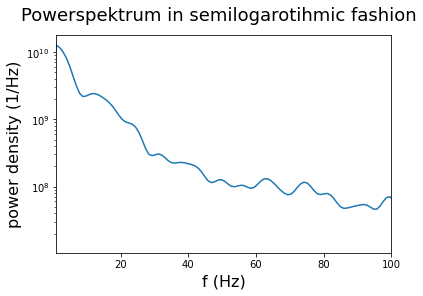

In [ ]:
# TASK3a, STUDENTS:
# Choose number of samples to use for the FFT / power spectrum (NFFT)
nfft=256

# Generate a concatenated signal of our normalized LFP
lfp1_conc = conc_lfps4psd(lfps1, nfft=nfft)

# Plot psd of concatenated signal
plot_psd(lfp1_conc, sampling_frequency=sf1, title='Powerspektrum in semilogarotihmic fashion', nfft=nfft)

'''Correction'''
#points += 0.4

With the NFFT parameter of [`matplotlib.mlab.psd()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.psd.html), which you can control in `plot_psd()`, one can vary the number of sample points used to calculate the power spectrum. Play around with the number `nfft` and compare the power spectra to answer the following questions:

**TASK 3a: Questions**
* **q1:** What peaks can you detect in the power spectrum, and how do these relate to your observations in Task 2c?
* **q2:** How is `nfft` related to the resolution of the frequency axis?
* **q3:** Select a reasonable parameter for the `nfft` parameter from the four options. Why is the parameter optimally a power of 2?
    * 50-200, (optimal at 128)
    * 200-400, (optimal at 256)
    * 400-600, (optimal at 512)
    * 1000-2000, (optimal at 1024)
* **q4:** What is the NFFT parameter used for in the `conc_lfps4psd()` function?

**STUDENTS, Answers:**
* **for q1:** The peak is at the beginning which has more oscillation by 2c.
* **for q2:** Bigger nfft values has more samples and more resolution.Less nfft is more linear
* **for q3:** It is either 128 or 256. Other nfft have so much resolution. The curve is not stable in higher nffts(overfitting)
* **for q4:** It is number of datas which used in Welsch method.

## BONUS) Time-resolved power spectrum

If we look closely at the signal traces, you may find that the frequency composition changes with trial time. To analyse this in more detail, we will create a spectrogram (time-resolved power spectrum) using

    matplotlib.mlab.specgram()

Usage of the `specgram` function is somewhat similar to psd, but here the temporal domain comes into play: The spectra are calculated in a sliding time window of length `NFFT` sample points. In order to obtain a trial-averaged spectrogram, unlike the `matplotlib.mlab.psd()` function, we have to calculate the spectrogram matrix (time x freq) for each trial individually, and then average across the matrices of each trial.
We use

    pyplot.pcolor()

to make a plot of the resulting trial-averaged power (coded in color) as a function of time (x-axis) and frequency (y-axis). For better visibility, it is again advisable to plot not the resulting matrix itself, but the logarithm of the power (`numpy.log`).

The `noverlap` parameter of `specgram` lets you vary the resolution of the time axis, specifying by how many (of maximally `NFFT-1`) bins two consecutive sliding windows overlap.

In [ ]:
def plot_specgram(lfps, t_start, sampling_frequency, title, nfft, noverlap, ax=None):
    '''
    Plots the time resolved average spectrogram across trials using a logarithmic power representation.

    lfps: quantity numpy array containing lfp signals of different trials across rows
    t_start: time quantity of trial start time
    sampling_frequency: frequency quantity of sample aquisition of lfp signals
    title: string, title of matplotlib figure
    NFFT: int, The number of data points used in each block for the FFT during specgram calculation.
    noverlap: The number of points of overlap between blocks. The default value is 128.
    '''
    # Generates the sum of spectrograms of all lfp signals
    for i, lfp in enumerate(lfps):
        spectrum_temp, spectrum_freqs, spectrum_times = matplotlib.mlab.specgram(lfp,
                                                                                 NFFT=nfft,
                                                                                 noverlap=noverlap,
                                                                                 Fs=sampling_frequency.rescale("Hz"))
        if i==0:
            spectrum = spectrum_temp.copy()
        else:
            # summing spectrograms of different trials
            spectrum += spectrum_temp

    # Generates the averaged spectrogram and its time axis
    spectrum_times = (spectrum_times + t_start).rescale('ms')
    spectrum /= len(lfps)

    if ax is None:
        fig, ax = plt.subplots()
    # Plots the spectrogram with logarithmic power
    # Hint: Try plotting only a slice of spectrum to cover a part of the frequency axis.
    ax.pcolor(spectrum_times, spectrum_freqs, np.log(spectrum), shading='auto')

    # Defines plot parameters for x and y axis and add title
    ax.set_xlabel('t ({0})'.format(spectrum_times.dimensionality), size=16)
    ax.set_ylabel('f (Hz)', size=16)
    plt.axis('tight')
    ax.set_title(title, size=18)

**BONUS TASK:** Plot the trial averaged spectrogram using `plot_specgram()` and play around with the parameters (`NFFT`, `noverlap`) to obtain a good representation of the time, frequency and power!
Hint: Plotting the complete frequency axis may obscure features in the time-resolved power spectrum due to the high dynamic range of the values of the power. Try modifying the function to plot only a part of the frequency axis!

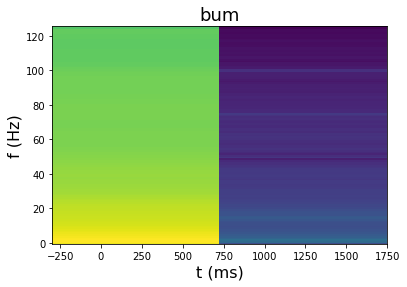

In [ ]:
# BONUS TASK, STUDENT:
# plot the trial averaged spectrogram
plot_specgram(lfps1, times1[0], sf1, title="bum", nfft=256, noverlap=False)

**BONUS TASK, Questions:**
* **q1:** What is the trade-off when using either small or large values of nfft?
* **q2:** Which frequency bands are prominent at which time? Can you associate the time-resolved power spectrum to features observed in the plots of the raw data?

**BONUS TASK, Answers:**
* **for q1:** `$$$`
* **for q2:** `$$$`

# 4) Analysis of multiple LFPs

## 4.1) Loading and visualizing a second data trace

In the file `lfp2.mat` in the `data` subdirectory you will find another stretch of LFP data. It was recorded simultaneously with the one you have looked at before, but from an electrode about 400$\mu$m away. While a spike from a neuron is typically only observed on one of two electrodes this far apart, LFPs may very well show a strong resemblance at these distances.

**TASK 4a, Code**:
In analogy to the previous tasks,
* load the data and create a new lfp numpy array `lfps2`,
* $z$-transform `lfps2`,
* plot simultaneous the LFP traces of LFP 1 and 2 with `plot_lfp()` function (use different colors for the different data sets).

Loading data/dataset2.mat


<AxesSubplot:title={'center':'LFP1 (red) vs LFP2 (blue)'}, xlabel='t (ms)', ylabel='trials'>

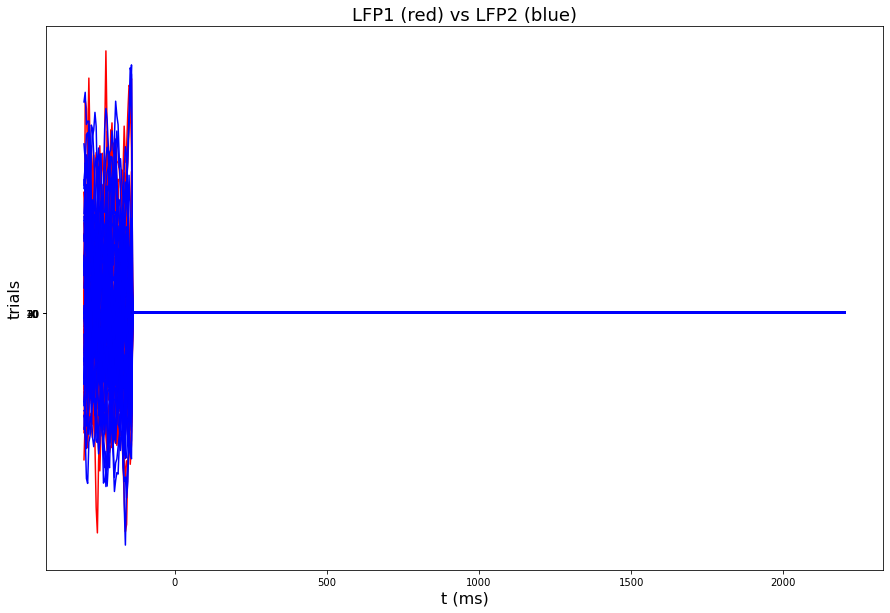

In [ ]:
# TASK4a, STUDENTS:
# Load second data file
filename = os.path.sep.join(['data', 'dataset2.mat'])
print("Loading {0}".format(filename))
dataset2 = scipy.io.loadmat(filename, squeeze_me=True)

# Make your life easy, and get only the relevant values
lfps2 = dataset2['lfp_matrix'] * pq.uV
times2 = dataset2['time'] * pq.ms
sf2 = dataset2['sf'] * pq.Hz

# Z-transform the LFP signals of the second dataset
perform_zscore(lfps2)


# Plot the z-transformed LFP signals of lfps1 and lfps2
fig, ax = plt.subplots(figsize=(15,10))
title = 'LFP1 (red) vs LFP2 (blue)'
plot_lfp(lfps1, times1, title, color='r', ax=ax)
plot_lfp(lfps2, times2, title, color='b', ax=ax)

**Task 4a, Question:**

What features are similar between the two signals? What is different?

**TASK 4a, Answer:**
* **for q1:** `$$$`

## 4.2) Comparison of power spectra

Let's investigate the power spectrum (psd and spectrogram) of the two electrodes.

**TASK 4b**
- Plot the psd of lfps1 and lfps2 into one plot using different colors.
- Plot the spectrograms of lfps1 and lfps2. (Bonus)

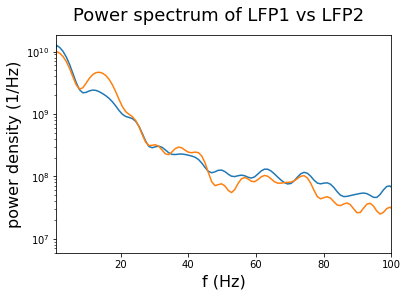

In [ ]:
# TASK4b, STUDENT:
# Generate a concatenated signal of our normalized LFP
lfp2_conc = conc_lfps4psd(lfps2)

# Plot the psd for lfps1 and lfps2 on one axis
titles = 'Power spectrum of LFP1 vs LFP2'
plot_psd(lfp1_conc, sampling_frequency=sf1,title=titles)
plot_psd(lfp2_conc, sampling_frequency=sf2,title=titles)

### Bonus) Comparison of spectrograms

In [ ]:
# BONUS TASK, STUDENTS
# Plot both spectrograms next to each other

$$$


## 4.3) Coherence phase

Look closely at the $z$-transformed LFP traces obtained earlier. Are the signals aligned, or phase-shifted? To examine this question in detail, let's calculate the phase differences of the coherence spectrum between the two recordings. For this analysis, we will program our own *poor-man's version* of a cross-spectral density using the Fourier transform functions of scipy. Remember that the cross-spectrum is a complex valued function of frequency, and its angle in the complex plane indicates the average phase shift between the two signals:
$$
C_{XY}=S_X(f)S^*_Y(f)=s_X(f)s_Y(f)e^{i\phi_X(f)}e^{-i\phi_Y(f)}=s_X(f)s_Y(f)e^{i(\phi_X(f)-\phi_Y(f))}=s_X(f)s_Y(f)e^{i\Delta\phi(f)},
$$
where $S_X$ and $S_Y$ are the Fourier transforms of two signals $X$ and $Y$.

We will start by calculating cross spectra $C_{XY}$ on a trial-by-trial basis and then average them.
(Concatenating the trials like we did above is in principle possible, but will lead to a very poor estimate of the spectra due to the large number of data points and requires a smarter approach to obtain the spectral estimates, such as internally performed by functions such as the `psd` used above).


**TASK 4c:**
* Calculate the discrete FFT (fast Fourier transform) for LFP 1 and 2 of the first trial using [`np.fft.fft()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html). The output of this function is a vector containing the FFT for positive and negative frequencies.
* Check and plot the output of the `fft` function: you will notice that the FFT function return complex Fourier transform contributions for both positive and negative frequencies. Plot the real and imaginary part separately (use `np.real` and `np.imag`). The vector of frequencies corresponding to the bins of the output vector of `fft()` can be obtained using the function [`np.fft.fftfreq()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html) (Hint: look into the documentation to pass the correct arguments).

In [ ]:
# TASK 4c, STUDENTS
# Get trial one of lfps1 and lfps2
lfp1 = lfps1[0]
lfp2 = lfps2[0]

# Calculate Fourier transforms of trial one of lfps1 and lfps2
fft1 = np.fft.fft(lfp1)
fft2 = np.fft.fft(lfp2)
print(len(fft1))

626


<class 'numpy.ndarray'>
freqs vector: [   0.            0.39936102    0.79872204    1.19808307    1.59744409
    1.99680511    2.39616613    2.79552716    3.19488818    3.5942492
    3.99361022    4.39297125    4.79233227    5.19169329    5.59105431
    5.99041534    6.38977636    6.78913738    7.1884984     7.58785942
    7.98722045    8.38658147    8.78594249    9.18530351    9.58466454
    9.98402556   10.38338658   10.7827476    11.18210863   11.58146965
   11.98083067   12.38019169   12.77955272   13.17891374   13.57827476
   13.97763578   14.37699681   14.77635783   15.17571885   15.57507987
   15.97444089   16.37380192   16.77316294   17.17252396   17.57188498
   17.97124601   18.37060703   18.76996805   19.16932907   19.5686901
   19.96805112   20.36741214   20.76677316   21.16613419   21.56549521
   21.96485623   22.36421725   22.76357827   23.1629393    23.56230032
   23.96166134   24.36102236   24.76038339   25.15974441   25.55910543
   25.95846645   26.35782748   26.7571885

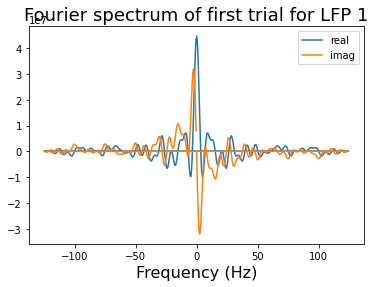

In [ ]:
# Print the data type (dtype) of the entries in fft1
print(type(fft1))


# Print freqs vector
freqs = np.fft.fftfreq(n=lfp1.size, d=1.0/sf1.rescale('Hz'))
print('freqs vector:', freqs)

# Plot real and imaginary part of the Fourier transform of lfp1
fig, ax = plt.subplots()
ax.set_title('Fourier spectrum of first trial for LFP 1', size=18)
ax.plot(freqs, np.real(fft1), label='real')
ax.plot(freqs, np.imag(fft1), label='imag')
ax.set_xlabel('Frequency (Hz)', size=16)
plt.legend();

* Look at the frequency vector `freqs` you just printed: how is it constructed? Where are the positive frequencies, and where are the negative frequencies stored? Now remove the components of the negative frequencies from the calculated FFT vectors `fft1` and `fft2` of LFP 1 and 2, and from the frequency vector `freqs`. Thus, the two resulting vectors should be only half as long as their original size.

In [ ]:
# Remove the negative frequencies from the calculated FFT vectors of LFP 1 and 2

fft1 = fft1[:313]
fft2 = fft2[:313]
freqs = np.fft.fftfreq(n=lfp1.size, d=1.0/sf1.rescale('Hz'))[:313]



* Now, multiply frequency-by-frequency (bin by bin) the FFT vector of LFP 1 and 2 by their respective complex conjugate (`numpy.conjugate()`) to obtain an estimate of the power spectral density `ps`.
* For each trial multiply the FFT of LFP 1 by the complex conjugate of the FFT of LFP 2 to obtain the cross spectral density `cs`.

In [ ]:
# TASK 4c, STUDENTS
ps1=fft1*np.conjugate(fft1)

ps2=fft2*np.conjugate(fft2)
cs=fft1*np.conjugate(fft2)

- Combine the previous analysis steps into the function below which calculates and returns the two power spectra and the complex values cross spectrum trial-by-trial and averages them across all trials.

In [ ]:
# TASK 4c, STUDENTS
def get_coherence(lfps1, lfps2):
    sum_ps1 = 0
    sum_ps2 = 0
    sum_cs  = 0
    for lfp1, lfp2 in zip(lfps1, lfps2):
        # Fourier transforms
        fft1 = np.fft.fft(lfp1)
        fft2 = np.fft.fft(lfp2)
        freqs = np.fft.fftfreq(n=lfp1.size, d=1.0/sf1.rescale('Hz'))


        # Remove negative frequencies
        fft1 = fft1[:313]
        fft2 = fft2[:313]
        freqs = np.fft.fftfreq(n=lfp1.size, d=1.0/sf1.rescale('Hz'))[:313]

        # add spectra for each trials
        sum_ps1 +=fft1*np.conjugate(fft1)
        sum_ps2 += fft2*np.conjugate(fft2)
        sum_cs  += fft1*np.conjugate(fft2)

    # Average
    cs  = sum_cs  / len(lfps1)
    ps1 = sum_ps1 / len(lfps1)
    ps2 = sum_ps2 / len(lfps1)

    return cs, np.real(ps1), np.real(ps2), freqs

* Now, plot as a function of frequency
    * the (trial-averaged) power spectra of LFP 1 and LFP 2 *(How does this poor version compare to the more sophisticated estimates calculated in task 4.2 of this exercise?)*,
    * the absolute value of the cross-spectral density $|C_{XY}|$,
    * the coherency ($|C_{XY}|/\sqrt{P_XP_Y}$),
    * and the phase shift $\Delta\phi(f)$ (obtained as the angle of the cross spectral density).
    

* Hint: Look for correponding numpy functions to extract, for example, the absolute value and the angle.

/opt/conda/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


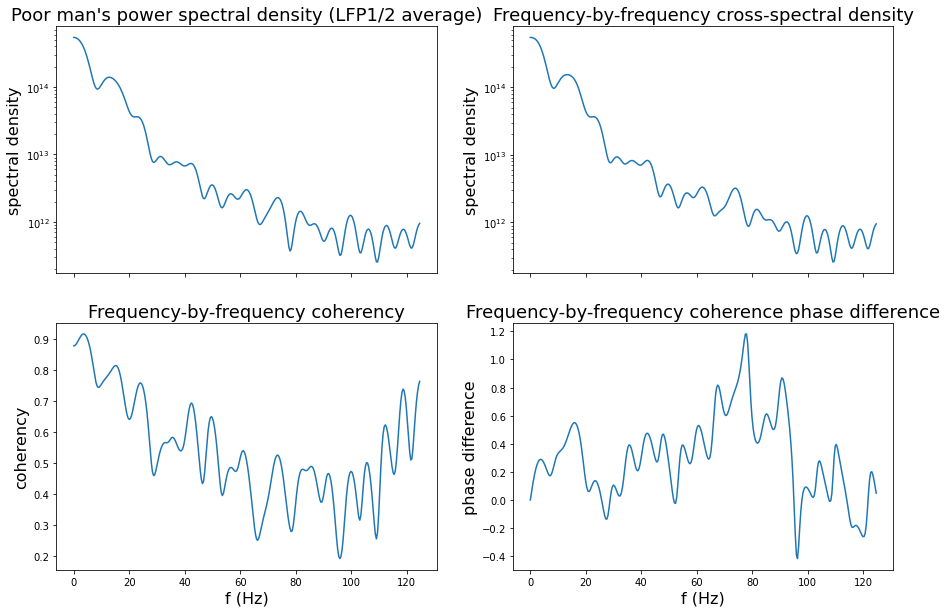

In [ ]:
# TASK 4c, STUDENTS
cs, ps1, ps2, freqs = get_coherence(lfps1, lfps2)
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15,10))

ax[0,0].set_title("Poor man's power spectral density (LFP1/2 average)", size=18)
ax[0,0].semilogy(freqs, cs)
ax[0,0].set_ylabel('spectral density', size=16)

ax[0,1].set_title('Frequency-by-frequency cross-spectral density', size=18)
ax[0,1].semilogy(freqs, np.abs(cs))
ax[0,1].set_ylabel('spectral density', size=16)

ax[1,0].set_title('Frequency-by-frequency coherency', size=18)
ax[1,0].plot(freqs, np.abs(cs/np.sqrt(ps1*ps2) ))
ax[1,0].set_xlabel('f (Hz)', size=16)
ax[1,0].set_ylabel('coherency', size=16)

ax[1,1].set_title('Frequency-by-frequency coherence phase difference', size=18)
ax[1,1].plot(freqs, np.angle(cs))
ax[1,1].set_xlabel('f (Hz)', size=16)
ax[1,1].set_ylabel('phase difference', size=16);

# Acknowledgements

Data are courtesy of Dr. Alexa Riehle, Institut de Neurosciences de la Timone (INT), UMR 7289, CNRS - Aix Marseille Univ., Marseille, France.